# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras.backend as K
from keras.utils import plot_model
from keras.models import Model, load_model, clone_model

from sofenn import SelfOrganizer
from sofenn.FuzzyNetwork import FuzzyNetwork
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Read in and prep Iris Dataset

In [2]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

## Create Self Organizer

In [3]:
sofnn = SelfOrganizer(
             ksig=1.12, max_widens=250,          # adding neuron or widening centers
             prune_tol=0.85, k_rmse=0.1,          # pruning parameters
             debug=True
                )

### Create Network

In [4]:
start_neurons = 25

sofnn.build_network(
                 X_train, X_test, y_train, y_test,        # data attributes
                 neurons=start_neurons, max_neurons=100,  # neuron initialization parameters
                 ifpart_thresh=0.1354,                    # ifpart and error thresholds
                 prob_type='classification'               # type of problem (classification/regression)
)

network = sofnn.network

Building Fuzzy Network with 25 neurons...
Instructions for updating:
Colocations handled automatically by placer.
...Model successfully built!


### Compile Model

In [5]:
loss = sofnn.network.loss_function
optimizer = 'adam'
metrics = ['binary_accuracy']

sofnn.compile_model(init_c=True, random=True, init_s=True, s_0=4.0,
                    loss=loss, optimizer=optimizer, metrics=metrics)

Compiling model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 25)           200         Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 25)           0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 25)           125         Inputs[0][0]                     
                                                                 Normalization[0][0]      

### Train model

In [6]:
sofnn.train_model(epochs=45)

Training model...
Instructions for updating:
Use tf.cast instead.
Epoch 1/45
135/135 [==============================] - 1s 6ms/step - loss: 10.2228 - binary_accuracy: 0.6667
Epoch 2/45
135/135 [==============================] - 0s 256us/step - loss: 10.1619 - binary_accuracy: 0.6667
Epoch 3/45
135/135 [==============================] - 0s 272us/step - loss: 10.1068 - binary_accuracy: 0.6667
Epoch 4/45
135/135 [==============================] - 0s 257us/step - loss: 10.0402 - binary_accuracy: 0.6667
Epoch 5/45
135/135 [==============================] - 0s 119us/step - loss: 9.9957 - binary_accuracy: 0.6667
Epoch 6/45
135/135 [==============================] - 0s 141us/step - loss: 9.9073 - binary_accuracy: 0.6667
Epoch 7/45
135/135 [==============================] - 0s 189us/step - loss: 9.8523 - binary_accuracy: 0.6667
Epoch 8/45
135/135 [==============================] - 0s 146us/step - loss: 9.8485 - binary_accuracy: 0.6667
Epoch 9/45
135/135 [==============================] - 0s 136

### Adding Neuron

In [7]:
sofnn.model.get_weights()

[array([[ 6.3678393 ,  5.331752  ,  6.570406  ,  5.581352  ,  4.881678  ,
          5.9167843 ,  7.1881914 ,  5.3665032 ,  7.6236305 ,  8.0159855 ,
          5.8624344 ,  4.608199  ,  6.477     ,  4.8983693 ,  6.5887704 ,
          5.1603847 ,  6.853785  ,  6.0154552 ,  6.557422  ,  7.483419  ,
          4.992675  ,  5.7149725 ,  4.7968445 ,  5.4604735 ,  4.863268  ],
        [ 2.8398733 ,  2.4169877 ,  2.6676095 ,  2.5322669 ,  3.447356  ,
          2.8026128 ,  3.0178037 ,  2.4554107 ,  2.8662074 ,  3.6491075 ,
          2.620231  ,  3.1173267 ,  3.3742304 ,  3.6590462 ,  2.572337  ,
          3.3613102 ,  2.7449706 ,  2.6062071 ,  2.477744  ,  2.9662352 ,
          3.9319863 ,  2.5605433 ,  3.280608  ,  4.260354  ,  2.676512  ],
        [ 5.1843686 ,  3.938379  ,  5.901959  ,  3.8689718 ,  1.1793845 ,
          4.7958627 ,  5.2032733 ,  3.964856  ,  6.381959  ,  6.6843867 ,
          4.305315  ,  1.3811549 ,  5.692817  ,  1.6770291 ,  5.200583  ,
          1.2796346 ,  4.8575006 ,  

In [8]:
sofnn.add_neuron()

Adding neuron...
Neuron successfully added! - 26 current neurons...


True

In [9]:
sofnn.model.get_weights()

[array([[ 6.3678393 ,  5.331752  ,  6.570406  ,  5.581352  ,  4.881678  ,
          5.9167843 ,  7.1881914 ,  5.3665032 ,  7.6236305 ,  8.0159855 ,
          5.8624344 ,  4.608199  ,  6.477     ,  4.8983693 ,  6.5887704 ,
          5.1603847 ,  6.853785  ,  6.0154552 ,  6.557422  ,  7.483419  ,
          4.992675  ,  5.7149725 ,  4.7968445 ,  5.4604735 ,  4.863268  ,
          6.3678393 ],
        [ 2.8398733 ,  2.4169877 ,  2.6676095 ,  2.5322669 ,  3.447356  ,
          2.8026128 ,  3.0178037 ,  2.4554107 ,  2.8662074 ,  3.6491075 ,
          2.620231  ,  3.1173267 ,  3.3742304 ,  3.6590462 ,  2.572337  ,
          3.3613102 ,  2.7449706 ,  2.6062071 ,  2.477744  ,  2.9662352 ,
          3.9319863 ,  2.5605433 ,  3.280608  ,  4.260354  ,  2.676512  ,
          2.8398733 ],
        [ 5.1843686 ,  3.938379  ,  5.901959  ,  3.8689718 ,  1.1793845 ,
          4.7958627 ,  5.2032733 ,  3.964856  ,  6.381959  ,  6.6843867 ,
          4.305315  ,  1.3811549 ,  5.692817  ,  1.6770291 ,  5.20

### Pruning Nuerons

sofnn.prune_neurons()

kwargs = ['epochs']

def test(**kwargs):
    if 'epochs' in kwargs:
        print(kwargs)
test()

In [10]:
sofnn.organize()

Adding neuron...
Neuron successfully added! - 27 current neurons...
Training model...
Epoch 1/250
135/135 [==============================] - 1s 6ms/step - loss: 10.3546 - binary_accuracy: 0.6617
Epoch 2/250
135/135 [==============================] - 0s 163us/step - loss: 9.7206 - binary_accuracy: 0.6617
Epoch 3/250
135/135 [==============================] - 0s 214us/step - loss: 8.9357 - binary_accuracy: 0.6741
Epoch 4/250
135/135 [==============================] - 0s 214us/step - loss: 8.3987 - binary_accuracy: 0.7358
Epoch 5/250
135/135 [==============================] - 0s 254us/step - loss: 8.2367 - binary_accuracy: 0.7531
Epoch 6/250
135/135 [==============================] - 0s 214us/step - loss: 8.0415 - binary_accuracy: 0.7383
Epoch 7/250
135/135 [==============================] - 0s 128us/step - loss: 7.9462 - binary_accuracy: 0.7383
Epoch 8/250
135/135 [==============================] - 0s 113us/step - loss: 7.6771 - binary_accuracy: 0.7481
Epoch 9/250
135/135 [==============

135/135 [==============================] - 0s 175us/step - loss: 3.6126 - binary_accuracy: 0.8691
Epoch 75/250
135/135 [==============================] - 0s 167us/step - loss: 3.6048 - binary_accuracy: 0.8691
Epoch 76/250
135/135 [==============================] - 0s 146us/step - loss: 3.4735 - binary_accuracy: 0.8691
Epoch 77/250
135/135 [==============================] - 0s 198us/step - loss: 3.4629 - binary_accuracy: 0.8691
Epoch 78/250
135/135 [==============================] - 0s 188us/step - loss: 3.4718 - binary_accuracy: 0.8716
Epoch 79/250
135/135 [==============================] - 0s 195us/step - loss: 3.4808 - binary_accuracy: 0.8716
Epoch 80/250
135/135 [==============================] - 0s 191us/step - loss: 3.4509 - binary_accuracy: 0.8716
Epoch 81/250
135/135 [==============================] - 0s 215us/step - loss: 3.2964 - binary_accuracy: 0.8716
Epoch 82/250
135/135 [==============================] - 0s 177us/step - loss: 3.3726 - binary_accuracy: 0.8716
Epoch 83/250
1

135/135 [==============================] - 0s 159us/step - loss: 2.2046 - binary_accuracy: 0.9753
Epoch 148/250
135/135 [==============================] - 0s 182us/step - loss: 2.2367 - binary_accuracy: 0.9753
Epoch 149/250
135/135 [==============================] - 0s 159us/step - loss: 2.2147 - binary_accuracy: 0.9753
Epoch 150/250
135/135 [==============================] - 0s 166us/step - loss: 2.2699 - binary_accuracy: 0.9753
Epoch 151/250
135/135 [==============================] - 0s 163us/step - loss: 2.2065 - binary_accuracy: 0.9753
Epoch 152/250
135/135 [==============================] - 0s 154us/step - loss: 2.2410 - binary_accuracy: 0.9753
Epoch 153/250
135/135 [==============================] - 0s 165us/step - loss: 2.2098 - binary_accuracy: 0.9753
Epoch 154/250
135/135 [==============================] - 0s 158us/step - loss: 2.1972 - binary_accuracy: 0.9753
Epoch 155/250
135/135 [==============================] - 0s 140us/step - loss: 2.2046 - binary_accuracy: 0.9753
Epoch 

135/135 [==============================] - 0s 161us/step - loss: 1.5438 - binary_accuracy: 0.9852
Epoch 221/250
135/135 [==============================] - 0s 153us/step - loss: 1.4875 - binary_accuracy: 0.9827
Epoch 222/250
135/135 [==============================] - 0s 169us/step - loss: 1.5102 - binary_accuracy: 0.9852
Epoch 223/250
135/135 [==============================] - 0s 159us/step - loss: 1.4431 - binary_accuracy: 0.9852
Epoch 224/250
135/135 [==============================] - 0s 155us/step - loss: 1.5068 - binary_accuracy: 0.9852
Epoch 225/250
135/135 [==============================] - 0s 158us/step - loss: 1.5036 - binary_accuracy: 0.9852
Epoch 226/250
135/135 [==============================] - 0s 178us/step - loss: 1.5193 - binary_accuracy: 0.9852
Epoch 227/250
135/135 [==============================] - 0s 142us/step - loss: 1.5160 - binary_accuracy: 0.9852
Epoch 228/250
135/135 [==============================] - 0s 125us/step - loss: 1.4537 - binary_accuracy: 0.9852
Epoch 

In [11]:
sofnn.network.neurons

27

In [10]:
preds = sofnn.model.predict(network.X_train)
preds

array([[0.21204683, 0.7854857 , 0.00246747],
       [0.272288  , 0.7174145 , 0.01029748],
       [0.22003397, 0.77694404, 0.00302197],
       [0.2842181 , 0.7023656 , 0.01341628],
       [0.28714874, 0.69853896, 0.01431225],
       [0.24526753, 0.7491703 , 0.00556221],
       [0.21800086, 0.7791278 , 0.00287141],
       [0.24924703, 0.7446505 , 0.00610254],
       [0.27465296, 0.71449256, 0.01085454],
       [0.25545374, 0.7375053 , 0.00704099],
       [0.24141243, 0.75350726, 0.00508033],
       [0.2088749 , 0.7888519 , 0.0022732 ],
       [0.2304319 , 0.7656625 , 0.00390563],
       [0.22723606, 0.76915145, 0.00361254],
       [0.27411488, 0.71515983, 0.01072533],
       [0.29049012, 0.6941041 , 0.01540576],
       [0.21537535, 0.78193796, 0.0026867 ],
       [0.23897628, 0.75622827, 0.00479549],
       [0.23346236, 0.7623348 , 0.00420281],
       [0.30002737, 0.68096346, 0.01900921],
       [0.29321903, 0.69042087, 0.0163601 ],
       [0.24900754, 0.7449238 , 0.00606873],
       [0.

In [11]:
E_rmae = mean_squared_error(network.y_train, preds)
E_rmae

0.30517409136009305

In [12]:
# create duplicate model and clone weights
prune_model = sofnn.duplicate_model()
act_weights = sofnn.model.get_weights()

In [14]:
delta_E = []
for neur in range(network.neurons):
    # reset prune model weights to actual weights
    prune_model.set_weights(act_weights)

    # get current prune weights
    w = prune_model.get_weights()
    a = w[2]
    # zero our i neuron column in weight vector
    a[:, neur] = 0
    prune_model.set_weights(w)

    # predict values with new zeroed out weights
    neur_pred = prune_model.predict(network.X_test)
    neur_rmae = mean_absolute_error(network.y_test, neur_pred)

    # append difference in rmse and new prediction rmse
    delta_E.append(neur_rmae - E_rmae)
delta_E = np.array(delta_E)
delta_E

array([0.15210323, 0.15168682, 0.12369449])

In [15]:
# choose max of tolerance or threshold limit
E = max(sofnn._prune_tol * E_rmae, sofnn._k_mae)
E

0.2593979776560791

In [22]:
# iterate over each neuron in ascending importance
# and prune until hit "important" neuron
deleted = []
# for each neuron up to second most important
for neur in delta_E.argsort()[:-1]:
    # reset prune model weights to actual weights
    prune_model.set_weights(act_weights)

    # get current prune weights
    w = prune_model.get_weights()
    a = w[2]
    # zero out previous deleted neurons
    for delete in deleted:
        a[:, delete] = 0
    # zero our i neuron column in weight vector
    a[:, neur] = 0
    prune_model.set_weights(w)

    # predict values with new zeroed out weights
    neur_pred = prune_model.predict(network.X_train)
    E_rmae_del = mean_absolute_error(network.y_train, neur_pred)
    
    print(E_rmae_del)

    # if E_mae_del < E
    # delete neuron
    if E_rmae_del < E:
        deleted.append(neur)
deleted

0.4318438596931504
0.4327395782975572


[]

In [23]:
E

0.2593979776560791

In [24]:
deleted = [1]

In [34]:
w = prune_model.get_weights()
w

[array([[6.5725527, 5.4399815, 6.5725527],
        [2.9785914, 2.7076423, 2.7076423],
        [5.400637 , 3.908422 , 3.908422 ],
        [1.7979747, 1.0074292, 1.2022222]], dtype=float32),
 array([[4.013405 , 3.7405446, 4.013405 ],
        [4.0589285, 3.869836 , 3.869836 ],
        [3.9257298, 3.7546628, 3.7546628],
        [4.036143 , 3.7209027, 2.6237717]], dtype=float32),
 array([[-0.05574143,  0.        ,  1.        ],
        [-0.02378742,  0.        ,  1.        ],
        [-0.01280571,  0.        ,  1.        ],
        [-0.14460018,  0.        ,  1.        ],
        [-0.12933777,  0.        ,  1.        ]], dtype=float32),
 array([[ 0.03643201,  0.26109552, -0.7407877 ]], dtype=float32),
 array([-0.00394318,  0.01967439, -0.00908445], dtype=float32)]

In [36]:
for i, weight in enumerate(w[:3]):
    w[i] = np.delete(weight, deleted, axis=-1)
w

[array([[6.5725527, 6.5725527],
        [2.9785914, 2.7076423],
        [5.400637 , 3.908422 ],
        [1.7979747, 1.2022222]], dtype=float32), array([[4.013405 , 4.013405 ],
        [4.0589285, 3.869836 ],
        [3.9257298, 3.7546628],
        [4.036143 , 2.6237717]], dtype=float32), array([[-0.05574143,  1.        ],
        [-0.02378742,  1.        ],
        [-0.01280571,  1.        ],
        [-0.14460018,  1.        ],
        [-0.12933777,  1.        ]], dtype=float32), array([[ 0.03643201,  0.26109552, -0.7407877 ]], dtype=float32), array([-0.00394318,  0.01967439, -0.00908445], dtype=float32)]

In [37]:
w_test = [1,2,3]

'{}'.format(w_test)

'[1, 2, 3]'

In [38]:
print('{} neurons successfully pruned! - {} current neurons...'.
                  format(len(deleted), network.neurons))


1 neurons successfully pruned! - 3 current neurons...


In [8]:
# get current weights
c_curr, s_curr = network.get_layer_weights(1)

### New Neuron Weights

In [9]:
# get input values and fuzzy weights
x = network.X_train
c, s = network.get_layer_weights(1)

### Min Dist Vector

In [10]:
# get input values and fuzzy weights
x = network.X_train
samples = x.shape[0]
c, s = network.get_layer_weights(1)

# align x and c and assert matching dims
aligned_x = x.repeat(network.neurons). \
    reshape(x.shape + (network.neurons,))
aligned_c = c.repeat(samples).reshape((samples,) + c.shape)
assert aligned_x.shape == aligned_c.shape

min_dist = np.abs(aligned_x - aligned_c).mean(axis=0)
min_dist.shape

(4, 2)

In [12]:
# get minimum distance across neurons
# and arg-min for neuron with lowest distance
dist_vec = min_dist.min(axis=-1)
min_neurs = min_dist.argmin(axis=-1)

In [13]:
dist_vec

array([2.22395482, 1.66317437, 2.15747145, 2.78227219])

In [14]:
min_neurs

array([0, 0, 1, 0])

In [15]:
# get min c and s weights
c_min = c[:, min_neurs].diagonal()
s_min = s[:, min_neurs].diagonal()
assert c_min.shape == s_min.shape

In [16]:
c_min.shape

(4,)

In [18]:
dist_thresh = 1
# set threshold distance as factor of mean
# value for each feature across samples
kd_i = x.mean(axis=0) * dist_thresh

In [20]:
# get final weight vectors
ck = np.where(dist_vec <= kd_i, c_min, x.mean(axis=0))
sk = np.where(dist_vec <= kd_i, s_min, dist_vec)

In [21]:
ck

array([6.2326479 , 2.67471886, 5.23959303, 1.20518519])

In [23]:
sk

array([3.88828325, 3.87935758, 4.06668282, 2.78227219])

In [24]:
# expand dim for stacking
ck = np.expand_dims(ck, axis=-1)
sk = np.expand_dims(sk, axis=-1)
c_new = np.hstack((c_curr, ck))
s_new = np.hstack((s_curr, sk))

In [29]:
ck

array([[6.2326479 ],
       [2.67471886],
       [5.23959303],
       [1.20518519]])

In [30]:
sk

array([[3.88828325],
       [3.87935758],
       [4.06668282],
       [2.78227219]])

In [27]:
c_new

array([[6.2326479 , 6.35563231, 6.2326479 ],
       [2.67471886, 2.79995608, 2.67471886],
       [4.84236383, 5.23959303, 5.23959303],
       [1.86366856, 1.84255338, 1.20518519]])

In [28]:
c_curr

array([[6.232648 , 6.3556323],
       [2.6747189, 2.799956 ],
       [4.842364 , 5.239593 ],
       [1.8636686, 1.8425534]], dtype=float32)

In [31]:
s_curr

array([[3.8882833, 4.092967 ],
       [3.8793576, 4.101973 ],
       [3.9268997, 4.066683 ],
       [3.9271975, 4.0689926]], dtype=float32)

In [32]:
s_new

array([[3.88828325, 4.09296703, 3.88828325],
       [3.87935758, 4.10197306, 3.87935758],
       [3.92689967, 4.06668282, 4.06668282],
       [3.92719746, 4.06899261, 2.78227219]])

In [34]:
mod2 = sofnn.duplicate_model()
mod2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 2)            16          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 2)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 2)            10          Inputs[0][0]                     
                                                                 Normalization[0][0]              
__________

In [43]:
network.get_layer_weights(1)

[array([[6.232648 , 6.3556323],
        [2.6747189, 2.799956 ],
        [4.842364 , 5.239593 ],
        [1.8636686, 1.8425534]], dtype=float32), array([[3.8882833, 4.092967 ],
        [3.8793576, 4.101973 ],
        [3.9268997, 4.066683 ],
        [3.9271975, 4.0689926]], dtype=float32)]

In [80]:
mod_test.get_layer('FuzzyRules').set_weights([c_new, s_new])

In [81]:
mod_test.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 3)            24          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 3)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 3)            15          Inputs[0][0]                     
                                                                 Normalization[0][0]              
__________

In [86]:
network.get_layer_weights(1)[0].shape[-1]

2

In [45]:
network.get_layer(1).set_weights([c_new, s_new])

ValueError: Layer weight shape (4, 2) not compatible with provided weight shape (4, 3)

In [89]:
w_0 = mod2.get_weights()
w_0

[array([[6.232648 , 6.3556323],
        [2.6747189, 2.799956 ],
        [4.842364 , 5.239593 ],
        [1.8636686, 1.8425534]], dtype=float32), array([[3.8882833, 4.092967 ],
        [3.8793576, 4.101973 ],
        [3.9268997, 4.066683 ],
        [3.9271975, 4.0689926]], dtype=float32), array([[-0.15375721, -0.05119193],
        [ 0.0032294 ,  0.0022638 ],
        [-0.1414709 , -0.1687291 ],
        [ 0.14846642,  0.17749232],
        [ 0.18237953,  0.18902668]], dtype=float32), array([[0.21429645, 1.0758615 , 1.2992578 ]], dtype=float32), array([ 0.1011592 , -0.02520198, -0.06069154], dtype=float32)]

In [90]:
for w in w_0: print(w.shape)

(4, 2)
(4, 2)
(5, 2)
(1, 3)
(3,)


In [92]:
for layer in mod2.layers:
    print(layer.name)
    for w in layer.get_weights():
        print(w.shape)

Inputs
FuzzyRules
(4, 2)
(4, 2)
Normalization
Weights
(5, 2)
RawOutput
Softmax
(1, 3)
(3,)


In [96]:
for w in mod2.get_weights():
    print(w.shape)

(4, 2)
(4, 2)
(5, 2)
(1, 3)
(3,)


In [93]:
for layer in mod_test.layers:
    print(layer.name)
    for w in layer.get_weights():
        print(w.shape)

Inputs
FuzzyRules
(4, 3)
(4, 3)
Normalization
Weights
(5, 3)
RawOutput
Softmax
(1, 3)
(3,)


In [99]:
w = sofnn.model.get_weights()
c_curr, s_curr, a_curr = w[0], w[1], w[2]

In [100]:
a_curr

array([[-0.15375721, -0.05119193],
       [ 0.0032294 ,  0.0022638 ],
       [-0.1414709 , -0.1687291 ],
       [ 0.14846642,  0.17749232],
       [ 0.18237953,  0.18902668]], dtype=float32)

In [107]:
a_add = np.ones((a_curr.shape[-2]))
a_add

array([1., 1., 1., 1., 1.])

In [109]:
a_add.shape

(5,)

In [111]:
a_curr.shape

(5, 2)

In [114]:
a_new = np.column_stack((a_curr, a_add))
a_new

array([[-0.15375721, -0.05119193,  1.        ],
       [ 0.0032294 ,  0.0022638 ,  1.        ],
       [-0.14147089, -0.1687291 ,  1.        ],
       [ 0.14846642,  0.17749232,  1.        ],
       [ 0.18237953,  0.18902668,  1.        ]])

In [69]:
new_neurons = 3

cust_config = mod2.get_config()
for layer in cust_config['layers']:
    if 'output_dim' in layer['config']:
        layer['config']['output_dim'] = new_neurons
cust_config

{'name': 'FuzzyNetwork',
 'layers': [{'name': 'Inputs',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 4),
    'dtype': 'float32',
    'sparse': False,
    'name': 'Inputs'},
   'inbound_nodes': []},
  {'name': 'FuzzyRules',
   'class_name': 'FuzzyLayer',
   'config': {'name': 'FuzzyRules',
    'trainable': True,
    'output_dim': 3,
    'initializer_centers': None,
    'initializer_sigmas': None},
   'inbound_nodes': [[['Inputs', 0, 0, {}]]]},
  {'name': 'Normalization',
   'class_name': 'NormalizedLayer',
   'config': {'name': 'Normalization', 'trainable': True, 'output_dim': 3},
   'inbound_nodes': [[['FuzzyRules', 0, 0, {}]]]},
  {'name': 'Weights',
   'class_name': 'WeightedLayer',
   'config': {'name': 'Weights', 'trainable': True, 'output_dim': 3},
   'inbound_nodes': [[['Inputs', 0, 0, {}], ['Normalization', 0, 0, {}]]]},
  {'name': 'RawOutput',
   'class_name': 'OutputLayer',
   'config': {'name': 'RawOutput', 'trainable': True},
   'inbound_nodes': [

In [94]:
custom_objects = {'FuzzyLayer': FuzzyLayer,
                  'NormalizedLayer': NormalizedLayer,
                  'WeightedLayer': WeightedLayer,
                  'OutputLayer': OutputLayer}


mod_test = Model.from_config(cust_config, custom_objects=custom_objects)

In [95]:
mod_test.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 3)            24          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 3)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 3)            15          Inputs[0][0]                     
                                                                 Normalization[0][0]              
__________

In [74]:
mod_test.get_layer('Weights').get_weights()

[array([[ 0.01608762,  0.0495098 , -0.00716443],
        [-0.03138988, -0.04511898,  0.02483669],
        [ 0.00100441,  0.0139542 ,  0.03746018],
        [ 0.03787808,  0.00742628,  0.00849212],
        [ 0.02752923, -0.04622564, -0.02791619]], dtype=float32)]

In [8]:
c,s = sofnn.new_neuron_weights()

In [9]:
c

array([6.02636433, 3.19501448, 1.09113073, 1.16740741])

In [10]:
s

array([4.11600065, 4.12234783, 3.78088975, 2.28123438])

In [11]:
y_pred = network.model_predictions()
y_pred

array([[0.42198706, 0.36054853, 0.21746439],
       [0.26561445, 0.27967227, 0.45471323],
       [0.4180984 , 0.3592678 , 0.22263381],
       [0.2634889 , 0.27820334, 0.45830783],
       [0.23521057, 0.25779092, 0.50699854],
       [0.29282996, 0.29766455, 0.40950555],
       [0.21743727, 0.24413411, 0.53842866],
       [0.4228344 , 0.36082187, 0.21634373],
       [0.31141686, 0.30906844, 0.37951472],
       [0.20374522, 0.23317428, 0.5630805 ],
       [0.20752625, 0.2362393 , 0.5562345 ],
       [0.22017133, 0.24627665, 0.533552  ],
       [0.25564608, 0.27270404, 0.47164986],
       [0.16668762, 0.2015428 , 0.6317696 ],
       [0.25087866, 0.2693003 , 0.479821  ]], dtype=float32)

In [12]:
sofnn.widen_centers()


Widening centers...
Centers widened after 0 iterations


### Test neuron pruning

In [13]:
network.neurons

2

### Create copy model

In [14]:
prune_model = sofnn.duplicate_model()
prune_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 2)            16          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 2)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 2)            10          Inputs[0][0]                     
                                                                 Normalization[0][0]              
__________

In [15]:
E_rmse = mean_squared_error(network.y_test, y_pred)
E_rmse

0.15689440585337014

In [16]:
act_weights = network.model.get_weights()
act_weights

[array([[ 6.3696566 ,  4.603665  ,  5.1672697 ,  6.9880404 ,  6.922022  ],
        [ 2.5602474 ,  3.4443538 ,  3.5287325 ,  2.9069643 ,  2.867683  ],
        [ 4.269643  ,  1.3399494 ,  1.2576641 ,  5.8979626 ,  4.9017005 ],
        [ 1.5707487 , -0.05153421,  0.15369044,  2.693892  ,  1.6926484 ]],
       dtype=float32),
 array([[3.7421691, 3.745316 , 3.7486923, 3.6966   , 3.7478955],
        [3.7193928, 4.199241 , 3.9959254, 3.7569969, 3.73914  ],
        [3.7529328, 3.7179635, 3.743473 , 3.6929634, 3.7371545],
        [3.7818456, 3.7100377, 3.7327769, 3.6916182, 3.6920516]],
       dtype=float32),
 array([[ 1.05593232e-02, -2.27281332e-01, -2.09979936e-01,
          7.50357881e-02,  7.80951381e-02],
        [ 6.46460354e-02, -2.60521203e-01, -1.65035546e-01,
          1.42984614e-01,  5.43518737e-02],
        [-1.82116944e-02, -2.64333963e-01, -1.87058493e-01,
          1.24080576e-01,  2.01590854e-04],
        [ 1.56993359e-01,  5.01807891e-02, -1.33926068e-02,
          1.63400292

ValueError: Unknown layer: FuzzyLayer

In [ ]:
delta_E = []
for neur in range(network.neurons):
    # reset prune model weights to actual weights
    prune_model.set_weights(act_weights)

    # get current prune weights
    c, s, a = prune_model.get_weights()
    # zero our i neuron column in weight vector
    a[:, neur] = 0
    prune_model.set_weights([c, s, a])

    # predict values with new zeroed out weights
    neur_pred = prune_model.predict(fuzzy_net.X_test)
    y_pred_neur = np.squeeze(np.where(neur_pred >= self._eval_thresh, 1, 0), axis=-1)
    neur_rmae = mean_absolute_error(fuzzy_net.y_test, y_pred_neur)

    # append difference in rmse and new prediction rmse
    delta_E.append(neur_rmae - E_rmae)


In [14]:
sofnn.add_neuron()


Adding neuron...
Building Fuzzy Network with 6 neurons...
...Model successfully built!
Training model...


RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [4]:
# loss = 'mean_squared_error'
loss = fuzz.loss_function
optimizer = 'adam'
metrics = ['binary_accuracy']

model = fuzz.model

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

model.fit(np.array(X_train),
          np.array(y_train),
          epochs=250,
          verbose=1,
          batch_size=2)

Epoch 1/250
135/135 [==============================] - 1s 7ms/step - loss: 0.6707 - binary_accuracy: 0.6667
Epoch 2/250
135/135 [==============================] - 0s 1ms/step - loss: 0.6608 - binary_accuracy: 0.6667
Epoch 3/250
135/135 [==============================] - 0s 1ms/step - loss: 0.6566 - binary_accuracy: 0.6667
Epoch 4/250
135/135 [==============================] - 0s 1ms/step - loss: 0.6520 - binary_accuracy: 0.6667
Epoch 5/250
135/135 [==============================] - 0s 1ms/step - loss: 0.6440 - binary_accuracy: 0.6667
Epoch 6/250
135/135 [==============================] - 0s 1ms/step - loss: 0.6330 - binary_accuracy: 0.6667
Epoch 7/250
135/135 [==============================] - 0s 1ms/step - loss: 0.6170 - binary_accuracy: 0.6667
Epoch 8/250
135/135 [==============================] - 0s 1ms/step - loss: 0.5963 - binary_accuracy: 0.6691
Epoch 9/250
135/135 [==============================] - 0s 1ms/step - loss: 0.5758 - binary_accuracy: 0.7086
Epoch 10/250
135/135 [======

135/135 [==============================] - 0s 1ms/step - loss: 0.0377 - binary_accuracy: 0.9852
Epoch 151/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0384 - binary_accuracy: 0.9802
Epoch 152/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0380 - binary_accuracy: 0.9852
Epoch 153/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0370 - binary_accuracy: 0.9852
Epoch 154/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0376 - binary_accuracy: 0.9852
Epoch 155/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0372 - binary_accuracy: 0.9852
Epoch 156/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0372 - binary_accuracy: 0.9852
Epoch 157/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0374 - binary_accuracy: 0.9852
Epoch 158/250
135/135 [==============================] - 0s 1ms/step - loss: 0.0373 - binary_accuracy: 0.9852
Epoch 159/250
135/135 [=

In [5]:
fuzz._get_layer_weights('FuzzyRules')

[array([[ 6.1073303,  5.8863463,  3.8469965],
        [ 2.4748902,  4.0579185,  1.1891739],
        [ 6.9911284,  1.0462298,  3.7106006],
        [ 3.7091155, -0.3453039,  2.5200057]], dtype=float32),
 array([[3.9457917, 5.1618943, 2.0746884],
        [3.2234733, 3.435901 , 2.1246395],
        [2.0414689, 3.5269158, 2.0570922],
        [1.4811075, 2.9864326, 1.6324853]], dtype=float32)]

In [6]:
X_test

array([[5. , 3.6, 1.4, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [4.6, 3.6, 1. , 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [5.9, 3. , 4.2, 1.5],
       [5.7, 3. , 4.2, 1.2],
       [6.9, 3.1, 4.9, 1.5],
       [4.8, 3. , 1.4, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.5, 1.4, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [6.4, 2.7, 5.3, 1.9],
       [6.1, 2.9, 4.7, 1.4],
       [4.8, 3.1, 1.6, 0.2]])

In [7]:
y_test

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
y_pred = model.predict(X_test)
y_pred.round()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [10]:
acc.sum() / acc.size

0.9555555555555556

## Model Prediction Results

In [11]:
pred_loss, pred_bin_acc = model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 9ms/step
Model Loss: 0.43104896
Binary Accuracy: 95.6%


In [12]:
model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


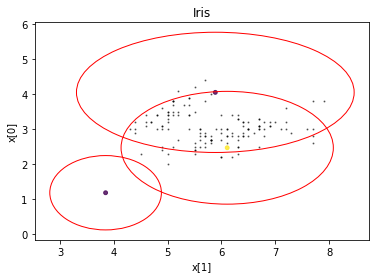

In [13]:
w = fuzz._get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()